<center> <h1> Wage prediction for the city of Yopal Casanare through machine learning</h1> </center>

## Abstract

This paper studies the relationship between the level of schooling and the level of wages of the economically active population (EAP)<br>
in an employed condition in Yopal Casanare. The data used for the analysis were obtained through surveys of the working population in<br>
the urban area between November and December 2021. The machine learning methodology includes the estimation by (lasso, trees, among <br>
other models) where it is proposed that the educational level affects the wages of workers. It is determined that the level of education<br>
is statistically significant in the wages of the EAP, where age and experience influence, but to a lesser extent on the level of income,<br>
in addition to this, there is wage discrimination by gender.<br><br>

Fifteen variables were mainly taken into account in the survey, of which seven were chosen for the study due to their level of significance.<br>
the study given their level of significance. It is worth mentioning that the survey questions were of the closed and semi-open categorical type.<br>
closed-ended and semi-open-ended categorical questions.

In [257]:
#import library

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Import data

In [258]:
data_yopal = pd.read_excel('datos modelos.xlsx')

# show head
data_yopal.head(5)

,Obs,"1. ¿Cuánto tiene de experiencia laboral, acumulados hasta ahora?",2. Rama de actividad económica a la que pertenece,3. ¿tiempo de experiencia acumulada en esta rama de la actividad económica?,4. canal debúsqueda de su actual empleo,5. Cargo que desempeña en su trabajo actual,6. Escriba el monto en dinero de su capacidad de gasto mensual,7. ¿A cuánto asciende el monto de su ingreso mensual?,8. Marque por favor el grado máximo de titulación académica culminada satisfactoriamente,9. Profesión,10. ¿Alguno de sus títulos académicos los realizó por fuera del Departamento?,11. ¿Alguno de sus títulos académicos los realizó fuera del país?,12. Género,13. Edad,14. Estado civil,15 Hijos
0,1,4.0,comercio al por mayor y menor,2.0,0,asesor (a),500000,1500000,profesional,administración de empresas,no,no,m,26,soltero,0
1,2,10.0,"actividades de la salud, profesionales, cientí...",8.0,1,publicista,2000000,2300000,profesional,ingeniería eléctrica,no,no,m,25,unión libre,1
2,3,16.0,"actividades de la salud, profesionales, cientí...",10.0,1,servicio técnico,2000000,300000,profesional,psicología,no,no,f,44,Casado (a),2
3,4,31.0,"actividades de la salud, profesionales, cientí...",28.0,1,técnico salud,1500000,2900000,profesional,zootecnia,no,no,m,54,unión libre,1
4,5,29.0,comercio al por mayor y menor,20.0,1,asistente o auxiliar,1000000,2300000,secundaria,comerciante,no,no,f,63,Casado (a),2


# Rename colums

This is to make it easier to write the variables

In [259]:
data_yopal.columns

Index(['Obs',
       '1. ¿Cuánto tiene de experiencia laboral, acumulados hasta ahora?',
       '2. Rama de actividad económica a la que pertenece',
       '3. ¿tiempo de experiencia acumulada en esta rama de la actividad económica?',
       '4. canal debúsqueda de su actual empleo',
       '5. Cargo que desempeña en su trabajo actual',
       '6. Escriba el monto en dinero de su capacidad de gasto mensual',
       '7. ¿A cuánto asciende el monto de su ingreso mensual?',
       '8. Marque por favor el grado máximo de titulación académica culminada satisfactoriamente',
       '9. Profesión',
       '10. ¿Alguno de sus títulos académicos los realizó por fuera del Departamento?',
       '11. ¿Alguno de sus títulos académicos los realizó fuera del país?',
       '12. Género', '13. Edad ', '14. Estado civil', '15 Hijos'],
      dtype='object')

In [260]:
data_yopal = data_yopal.rename(columns={ '1. ¿Cuánto tiene de experiencia laboral, acumulados hasta ahora?': 'work_experience_total', 
                                          '2. Rama de actividad económica a la que pertenece': 'economic_activity',
                                          '3. ¿tiempo de experiencia acumulada en esta rama de la actividad económica?': 'work_experiencia',
                                          '4. canal debúsqueda de su actual empleo': 'job_search_channel',
                                          '5. Cargo que desempeña en su trabajo actual': 'position',
                                          '6. Escriba el monto en dinero de su capacidad de gasto mensual': 'spending_capacity',
                                          '7. ¿A cuánto asciende el monto de su ingreso mensual?':  'income',
                                          '8. Marque por favor el grado máximo de titulación académica culminada satisfactoriamente': 'educacion',
                                          '9. Profesión': 'profession',
                                          '10. ¿Alguno de sus títulos académicos los realizó por fuera del Departamento?': 'degrees_outside_department',
                                          '11. ¿Alguno de sus títulos académicos los realizó fuera del país?' : 'degrees_outside_country',
                                          '12. Género': 'gender',
                                          '13. Edad ': 'age' ,
                                          '14. Estado civil':  'with_partner',
                                          '15 Hijos':  'with_children'                            
                                          })

data_yopal.head(3)

,Obs,work_experience_total,economic_activity,work_experiencia,job_search_channel,position,spending_capacity,income,educacion,profession,degrees_outside_department,degrees_outside_country,gender,age,with_partner,with_children
0,1,4.0,comercio al por mayor y menor,2.0,0,asesor (a),500000,1500000,profesional,administración de empresas,no,no,m,26,soltero,0
1,2,10.0,"actividades de la salud, profesionales, cientí...",8.0,1,publicista,2000000,2300000,profesional,ingeniería eléctrica,no,no,m,25,unión libre,1
2,3,16.0,"actividades de la salud, profesionales, cientí...",10.0,1,servicio técnico,2000000,300000,profesional,psicología,no,no,f,44,Casado (a),2


# Data exploration

In [261]:
print(f' Shape of date: {data_yopal.shape}')

 Shape of date: (406, 16)


In [262]:
# info data
data_yopal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Obs                         406 non-null    int64  
 1   work_experience_total       404 non-null    float64
 2   economic_activity           406 non-null    object 
 3   work_experiencia            386 non-null    float64
 4   job_search_channel          406 non-null    int64  
 5   position                    406 non-null    object 
 6   spending_capacity           406 non-null    int64  
 7   income                      406 non-null    int64  
 8   educacion                   406 non-null    object 
 9   profession                  406 non-null    object 
 10  degrees_outside_department  406 non-null    object 
 11  degrees_outside_country     406 non-null    object 
 12  gender                      406 non-null    object 
 13  age                         406 non

Note:
- There are missing values for some variables, more will be discussed later.

In [263]:
data_yopal.describe()

,Obs,work_experience_total,work_experiencia,job_search_channel,spending_capacity,income,age,with_children
count,406.000000,404.000000,386.000000,406.000000,4.060000e+02,4.060000e+02,406.000000,406.000000
mean,203.500000,12.432508,7.975950,0.687192,1.350648e+06,2.132159e+06,32.477833,1.002463
std,117.346353,10.934938,9.183141,0.464209,1.461790e+06,2.154637e+06,11.870422,1.289078
min,1.000000,0.166667,0.083333,0.000000,5.000000e+04,1.100000e+05,15.000000,0.000000
25%,102.250000,5.000000,2.000000,0.000000,7.000000e+05,1.000000e+06,24.000000,0.000000
50%,203.500000,9.000000,5.000000,1.000000,1.000000e+06,1.500000e+06,29.000000,1.000000
75%,304.750000,18.000000,10.000000,1.000000,1.500000e+06,2.500000e+06,39.000000,2.000000
max,406.000000,59.000000,50.000000,1.000000,2.000000e+07,2.000000e+07,78.000000,8.000000


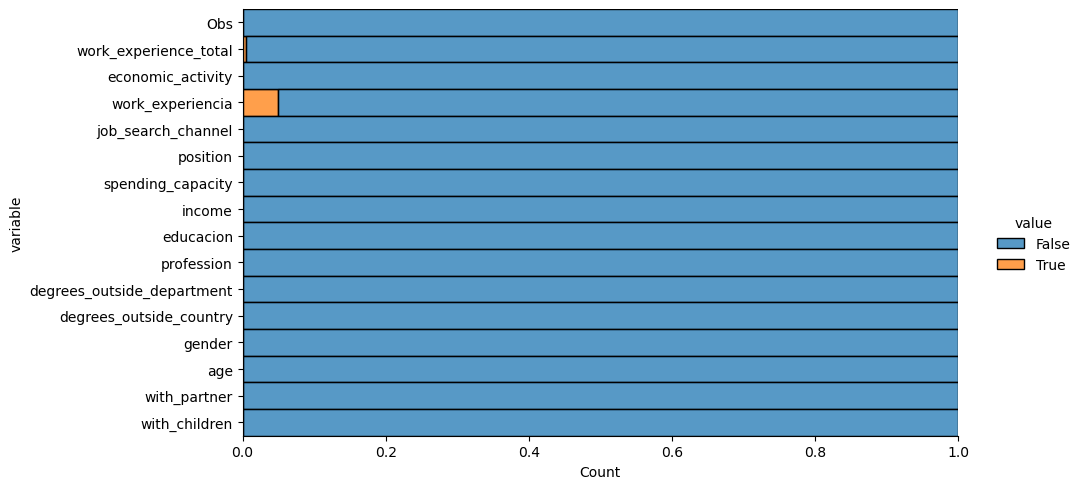

In [264]:
# Explrar graficamente el data frame 
(
    data_yopal
    .isnull()
    .melt()
    .pipe(
        lambda df:(
            sns.displot(
                data= df,
                y='variable',
                hue='value',
                multiple="fill",
                aspect= 2
            )
        )

    )
)
plt.show()

In [265]:
data_yopal.isnull().sum()

Obs                            0
work_experience_total          2
economic_activity              0
work_experiencia              20
job_search_channel             0
position                       0
spending_capacity              0
income                         0
educacion                      0
profession                     0
degrees_outside_department     0
degrees_outside_country        0
gender                         0
age                            0
with_partner                   0
with_children                  0
dtype: int64

Note: <br>
Some null values, let's impute
    

# Count plots

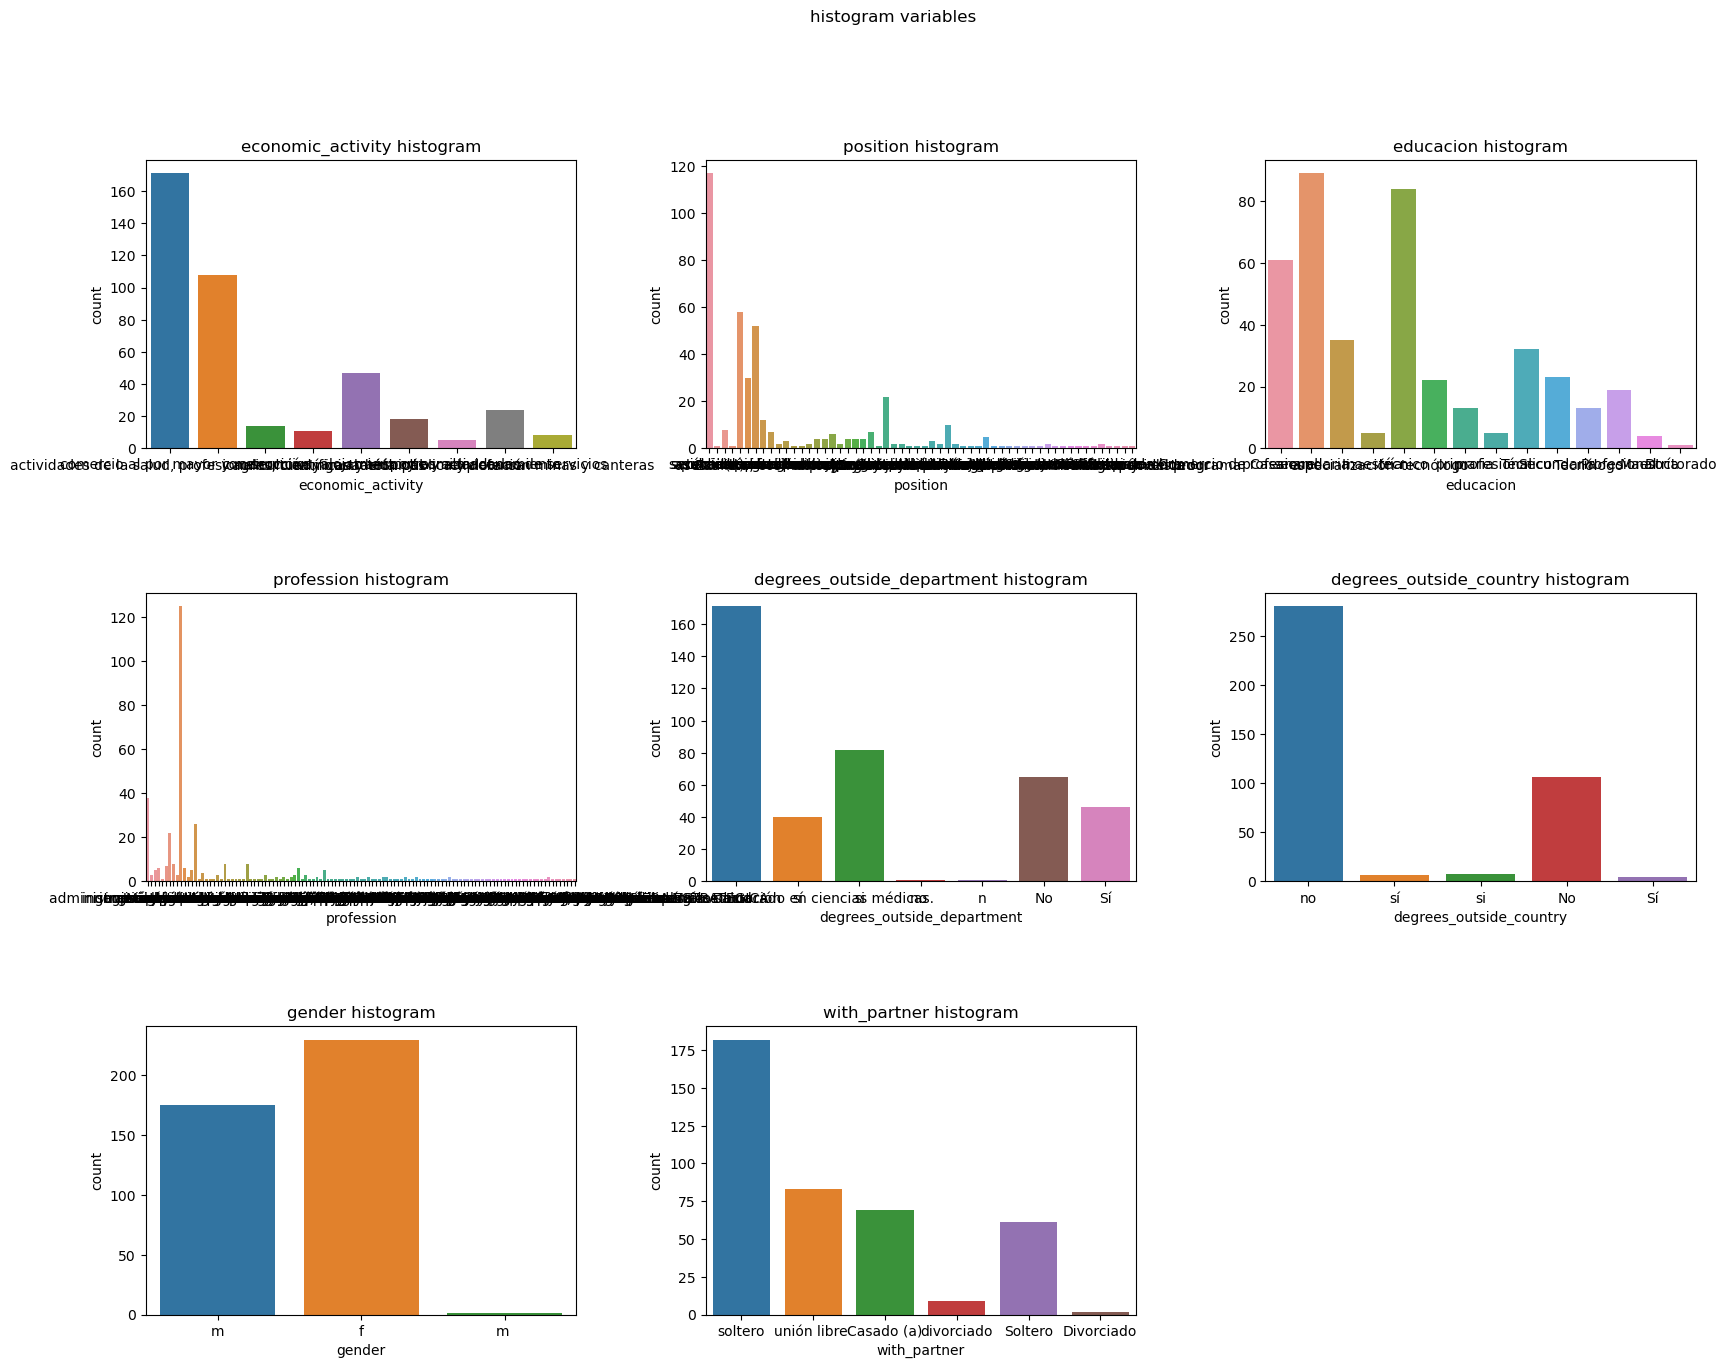

In [266]:
# list of features
vars_to_plot = ['economic_activity','position', 'educacion','profession','degrees_outside_department','degrees_outside_country', 'gender','with_partner']

# size of plot
fig = plt.figure(figsize=(20, 15))

# loop 
for i, var in enumerate(vars_to_plot):
    plt.subplot(3, 3, i+1)
    sns.countplot(data = data_yopal, x = var)
    plt.title(f'{var} histogram')
    
plt.suptitle('histogram variables ')
plt.subplots_adjust(hspace=0.5, wspace=0.3) # Adjust the space between images
plt.show()

Note:<br>
* some variable need be ecoding like
* the variables:<br>
 economic activity<br>
 possition<br>
 profession<br>


 has many categories and the database is not very large, if it is transformed with one hot it can cause problems, so let´s deleted

## distrubucion

In [267]:
data_yopal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Obs                         406 non-null    int64  
 1   work_experience_total       404 non-null    float64
 2   economic_activity           406 non-null    object 
 3   work_experiencia            386 non-null    float64
 4   job_search_channel          406 non-null    int64  
 5   position                    406 non-null    object 
 6   spending_capacity           406 non-null    int64  
 7   income                      406 non-null    int64  
 8   educacion                   406 non-null    object 
 9   profession                  406 non-null    object 
 10  degrees_outside_department  406 non-null    object 
 11  degrees_outside_country     406 non-null    object 
 12  gender                      406 non-null    object 
 13  age                         406 non

In [268]:
# list of features
vars_to_plot = ['work_experience_total', 'work_experiencia', 'job_search_channel', 'spending_capacity', 'income', 'age', 'with_children']

# size of plot
fig = plt.figure(figsize=(10, 15))

# loop 
for i, var in enumerate(vars_to_plot):
    plt.subplot(4, 2, i+1)
    sns.histplot(data=data_yopal, x=var)
    plt.title(f'{var} histogram vs output')
    
plt.suptitle('histogram plost vs output ')
plt.subplots_adjust(hspace=0.5, wspace=0.3) # Adjust the space between images
plt.show()

Note:<br>
the numerical variables are normally composed, but their proportion is different, so they will be normalised with min-max.

# Data imputation

In [ ]:
# copy of the data train is made for later manipulation.
from copy import deepcopy

data = deepcopy(data_yopal)

In [ ]:
#create funcion

def  inputar_data(data):
    """
    Imputation 
    """
    cols = ['work_experiencia', 'work_experience_total' ]
    for col in cols:
        data[col].fillna(data[col].mean(), inplace = True)
        
    return data

In [ ]:
data = inputar_data(data)

In [ ]:
data.isnull().sum()

Obs                           0
work_experience_total         0
economic_activity             0
work_experiencia              0
job_search_channel            0
position                      0
spending_capacity             0
income                        0
educacion                     0
profession                    0
degrees_outside_department    0
degrees_outside_country       0
gender                        0
age                           0
with_partner                  0
with_children                 0
dtype: int64

# Transforming data 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Obs                         406 non-null    int64  
 1   work_experience_total       406 non-null    float64
 2   economic_activity           406 non-null    object 
 3   work_experiencia            406 non-null    float64
 4   job_search_channel          406 non-null    int64  
 5   position                    406 non-null    object 
 6   spending_capacity           406 non-null    int64  
 7   income                      406 non-null    int64  
 8   educacion                   406 non-null    object 
 9   profession                  406 non-null    object 
 10  degrees_outside_department  406 non-null    object 
 11  degrees_outside_country     406 non-null    object 
 12  gender                      406 non-null    object 
 13  age                         406 non

In [ ]:
# delete variables not information 
data = data.drop(['Obs', 'economic_activity', 'position', 'profession', 'spending_capacity'],  axis = 1)

In [ ]:
# Gender 
data['gender'].replace({'m': 1, 'f': 0, 'm ': 1}, inplace= True)

# nivel education
data['educacion'].replace([
    'primaria', 'secundaria', 'Secundaria', 'técnico', 'Técnico', 'tecnólogo', 'Tecnólogo', 
    'profesional', 'profesional ', 'Profesional', 'especialización', 'maestría', 'Maestría', 'Doctorado'],
                          [ 1, 2, 2, 3, 3, 4, 4, 5, 5, 5, 6, 7, 7, 8  ], inplace= True)

# degrees_outside_department ecoding 
data['degrees_outside_department'].replace({'no':0 , 'sí':1, 'si':1, 'no ':0, 'n':0, 'No':0, 'Sí':1},  inplace= True)

# degrees_outside_country ecoding 
data['degrees_outside_country'].replace({'no':0, 'sí':1, 'si':1, 'No':0, 'Sí':1}, inplace= True)

# with_partner ecoding , if with_partner 1 else 0
data['with_partner'].replace({'soltero': 0, 'unión libre ': 1, 'Casado (a)': 1, 'divorciado': 0, 'Soltero': 0,'Divorciado': 0}, inplace = True)

In [ ]:
data.head(5)

,work_experience_total,work_experiencia,job_search_channel,income,educacion,degrees_outside_department,degrees_outside_country,gender,age,with_partner,with_children
0,4.0,2.0,0,1500000,5,0,0,1,26,0,0
1,10.0,8.0,1,2300000,5,0,0,1,25,1,1
2,16.0,10.0,1,300000,5,0,0,0,44,1,2
3,31.0,28.0,1,2900000,5,0,0,1,54,1,1
4,29.0,20.0,1,2300000,2,0,0,0,63,1,2


In [ ]:
data.columns

Index(['work_experience_total', 'work_experiencia', 'job_search_channel',
       'income', 'educacion', 'degrees_outside_department',
       'degrees_outside_country', 'gender', 'age', 'with_partner',
       'with_children'],
      dtype='object')

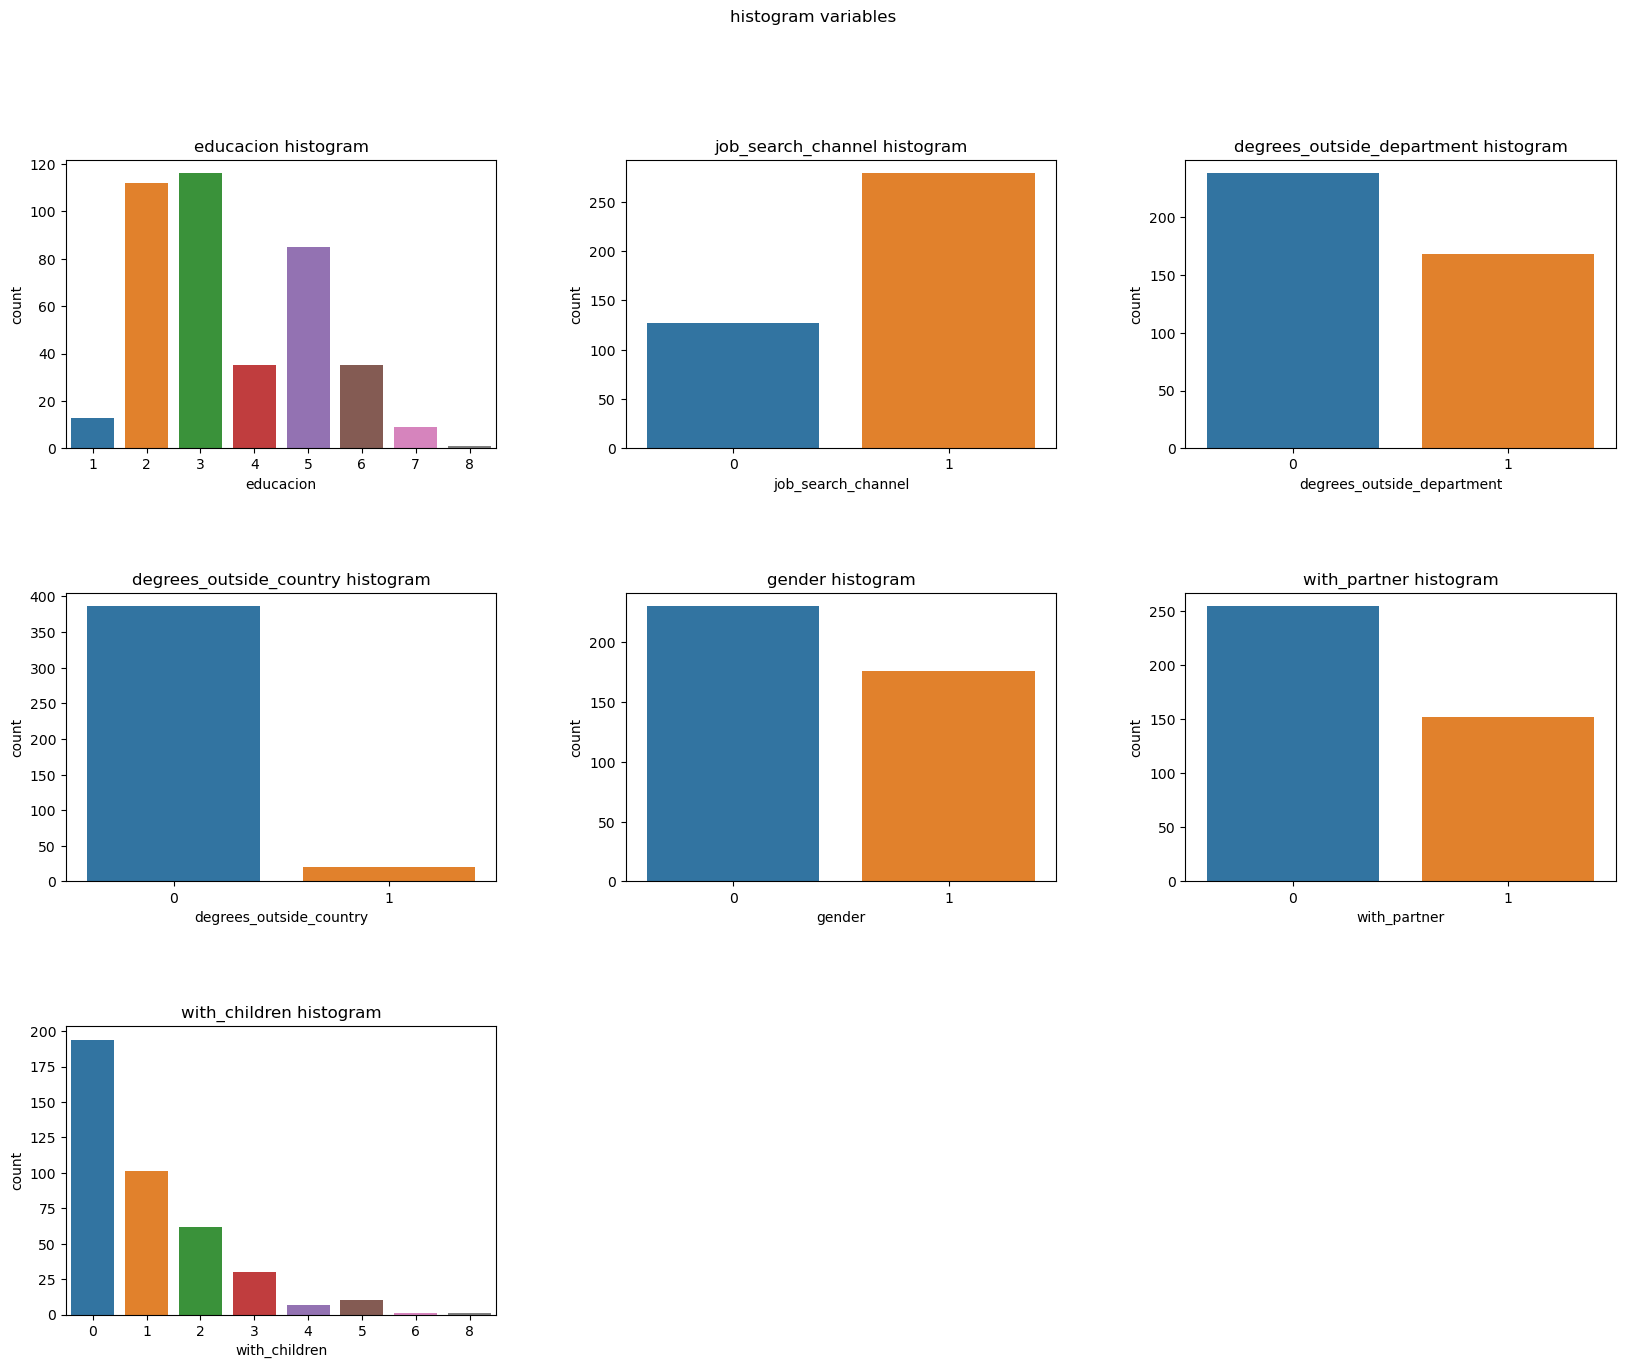

In [ ]:
# list of features
vars_to_plot = ['educacion', 'job_search_channel', 'degrees_outside_department', 'degrees_outside_country', 'gender', 'with_partner', 'with_children']

# size of plot
fig = plt.figure(figsize=(20, 15))

# loop 
for i, var in enumerate(vars_to_plot):
    plt.subplot(3, 3, i+1)
    sns.countplot(data = data, x = var)
    plt.title(f'{var} histogram')
    
plt.suptitle('histogram variables ')
plt.subplots_adjust(hspace=0.5, wspace=0.3) # Adjust the space between images
plt.show()

Note:
* The 'education' variable needs to be encoded as the higher categories have very few data points.
* 'degree outside country' is an imbalanced variable and should be removed.

## Ecoding variables

In [ ]:
data.drop('degrees_outside_country', axis= 1, inplace= True)

# If they have children: 1, if not 0
data['with_children'] = data['with_children'].apply(lambda x: 0 if x == 0 else 1)

# Education
data['educacion'].replace([1, 2, 3, 4, 5, 6, 7, 8], [1, 1, 2, 2, 3, 3, 3, 3], inplace= True)

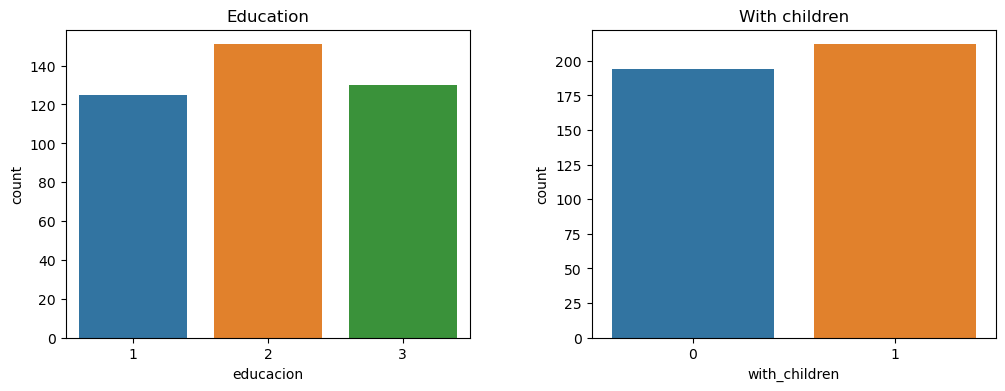

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
sns.countplot(data= data, x= 'educacion')
plt.title('Education')

plt.subplot(1,2,2)
sns.countplot(data= data, x= 'with_children')
plt.title('With children')

plt.subplots_adjust(wspace=0.3) # Adjust the space between images

# Let's implement a regression model first.

In [ ]:
# Importar models 

from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
X = data.drop('income', axis = 1)
y = data.income

print(f'Shape of X values: {X.shape}, shape y: {y.shape}')

Shape of X values: (406, 9), shape y: (406,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)

print(f' Shape X: {X.shape} shape: X tran values: {X_train.shape}, shape X test: {X_test.shape}')

 Shape X: (406, 9) shape: X tran values: (304, 9), shape X test: (102, 9)


In [ ]:
X.head(1)

,work_experience_total,work_experiencia,job_search_channel,educacion,degrees_outside_department,gender,age,with_partner,with_children
0,4.0,2.0,0,3,0,1,26,0,0


In [ ]:
# Instance object model
model = Lasso()

model.fit(X_train,y_train)

predicted = model.predict(X_test)
predicted.shape

(102,)

In [ ]:
#Display variables and coefficients
print(f'{model.feature_names_in_}')
print(('=')*40 )
print(f'{model.coef_}')

['work_experience_total' 'work_experiencia' 'job_search_channel'
 'educacion' 'degrees_outside_department' 'gender' 'age' 'with_partner'
 'with_children']
[ -19607.38078873   19994.56459598 -507327.82782024  486954.51580532
  658774.98157851  484239.58908112   39361.17884498  151852.68297661
   49811.42234451]


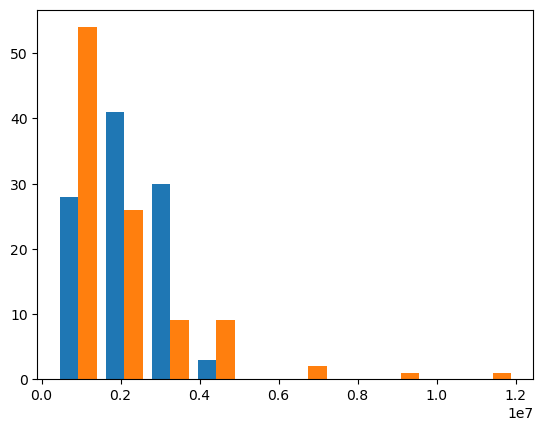

In [ ]:
plt.hist([predicted,y_test])
plt.show()

Note:<br>
The model shows acceptable performance between test and estimation, however further evaluation of the estimation is required. 

# Model evaluation

In [ ]:
# R2
model.score(X_test,y_test)

0.28307834343946414

Note:<br>
The first model is not good but.<br> 
In general, scores have to be complemented by visualisations of the data, as a metric does not always encode<br>
all the characteristics of a probability distribution

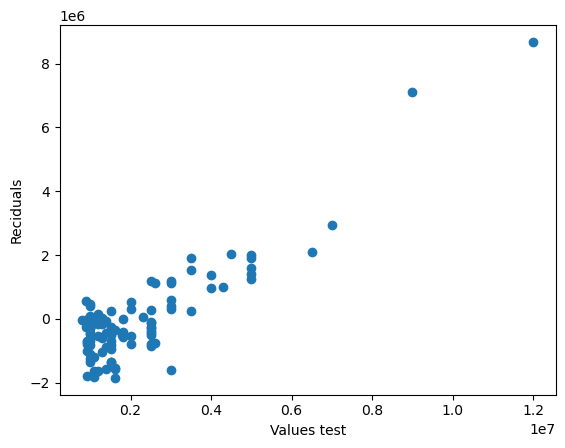

In [ ]:
# error absoluts
residuals = y_test - predicted
plt.scatter(y_test,residuals)
plt.xlabel('Values test')
plt.ylabel('Reciduals')
plt.show()

The graph not looks so good, the data is centred at zero but there is some apparent pattern.

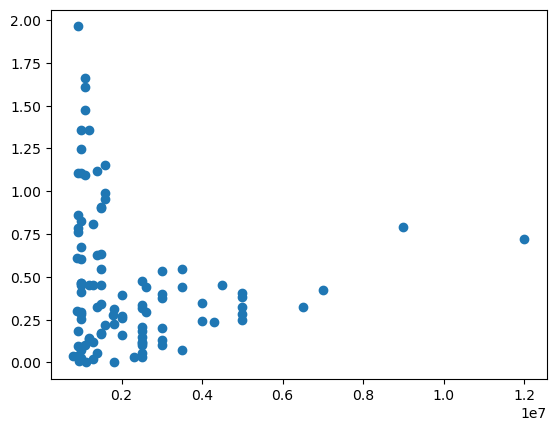

In [ ]:
# error percents
#abs absoluts values

ap_residuals = np.abs(residuals) / y_test
plt.scatter(y_test,ap_residuals) #plot
plt.show()

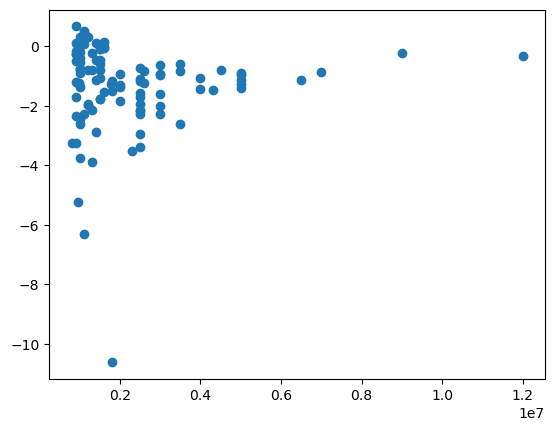

In [ ]:
#Applying logarithm helps to improve the visualisation and to observe the values in order of magnitude.

lap_residuals = np.log(ap_residuals)
plt.scatter(y_test,lap_residuals)
plt.show()

Note:<br>
* Not worket the model is bad 

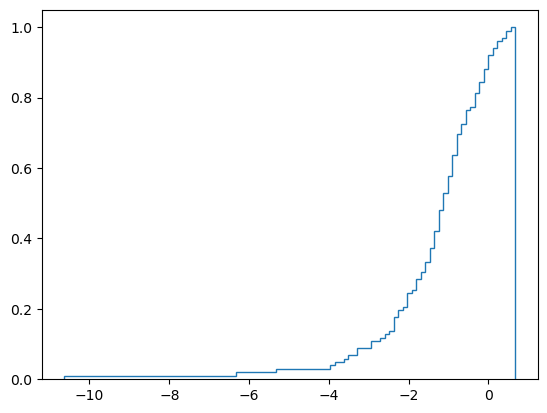

In [ ]:
# normed=1= normed values 
plt.hist(lap_residuals, bins=100, density=True, histtype='step', cumulative = True);

array([0.13533528, 0.22313016, 0.36787944, 0.60653066, 1.        ])

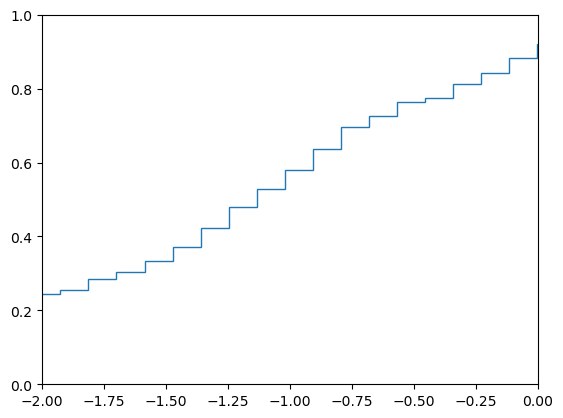

In [ ]:
plt.hist(lap_residuals, bins=100, density=True, histtype='step',cumulative=True);
plt.axis([-2,0,0,1])
np.power(np.exp(1)*np.ones(5),np.linspace(-2,0,5))

Note:<br>
* An error of less than 100% is in at least 90% of the cases.
* An error of less than 10% is in 50% of the data. <br>
* An error of less than 20% is in 23% of the data.

Estimators are not that good

# feature engineering:

<Axes: >

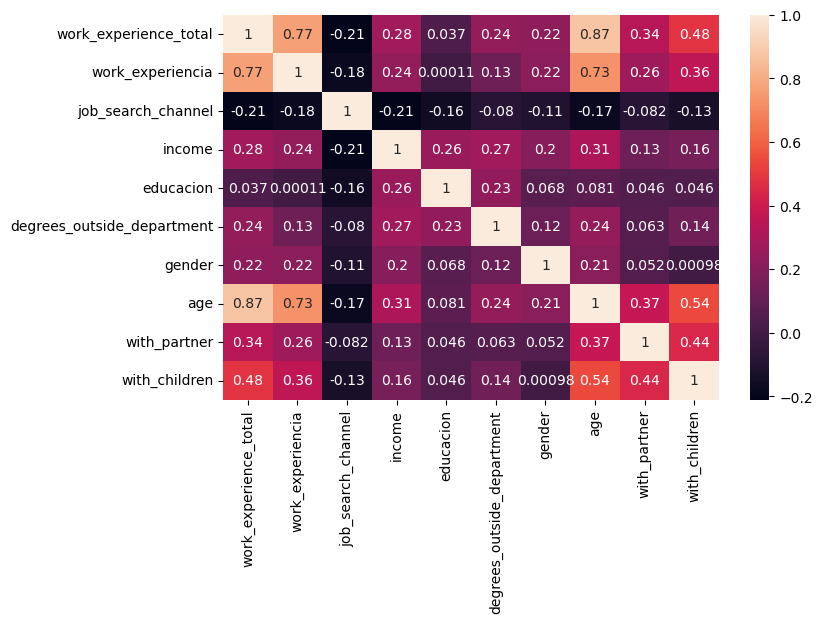

In [ ]:
fig = plt.figure(figsize=(8, 5))
sns.heatmap( data = data.corr(), annot= True)

Note:
* "work experience total" and "work experience" have multicollinearity, and "work_experience" will be removed because it has the lowest correlation with income.
* The "education" variable has the highest correlation.
* 'Degrees obtained outside' contribute.
* People with more work experience tend to have more children and, in turn, tend to be older.

In [ ]:
data.columns

Index(['work_experience_total', 'work_experiencia', 'job_search_channel',
       'income', 'educacion', 'degrees_outside_department', 'gender', 'age',
       'with_partner', 'with_children'],
      dtype='object')

Note: <br> 
* 

In [ ]:
data.head(3)

,work_experience_total,work_experiencia,job_search_channel,income,educacion,degrees_outside_department,gender,age,with_partner,with_children
0,4.0,2.0,0,1500000,3,0,1,26,0,0
1,10.0,8.0,1,2300000,3,0,1,25,1,1
2,16.0,10.0,1,300000,3,0,0,44,1,1
